In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance= pd.read_csv('Project 4_Insurance_factor_identification.csv')

array([[<AxesSubplot:title={'center':'Kilometres'}>,
        <AxesSubplot:title={'center':'Zone'}>,
        <AxesSubplot:title={'center':'Bonus'}>],
       [<AxesSubplot:title={'center':'Make'}>,
        <AxesSubplot:title={'center':'Insured'}>,
        <AxesSubplot:title={'center':'Claims'}>],
       [<AxesSubplot:title={'center':'Payment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

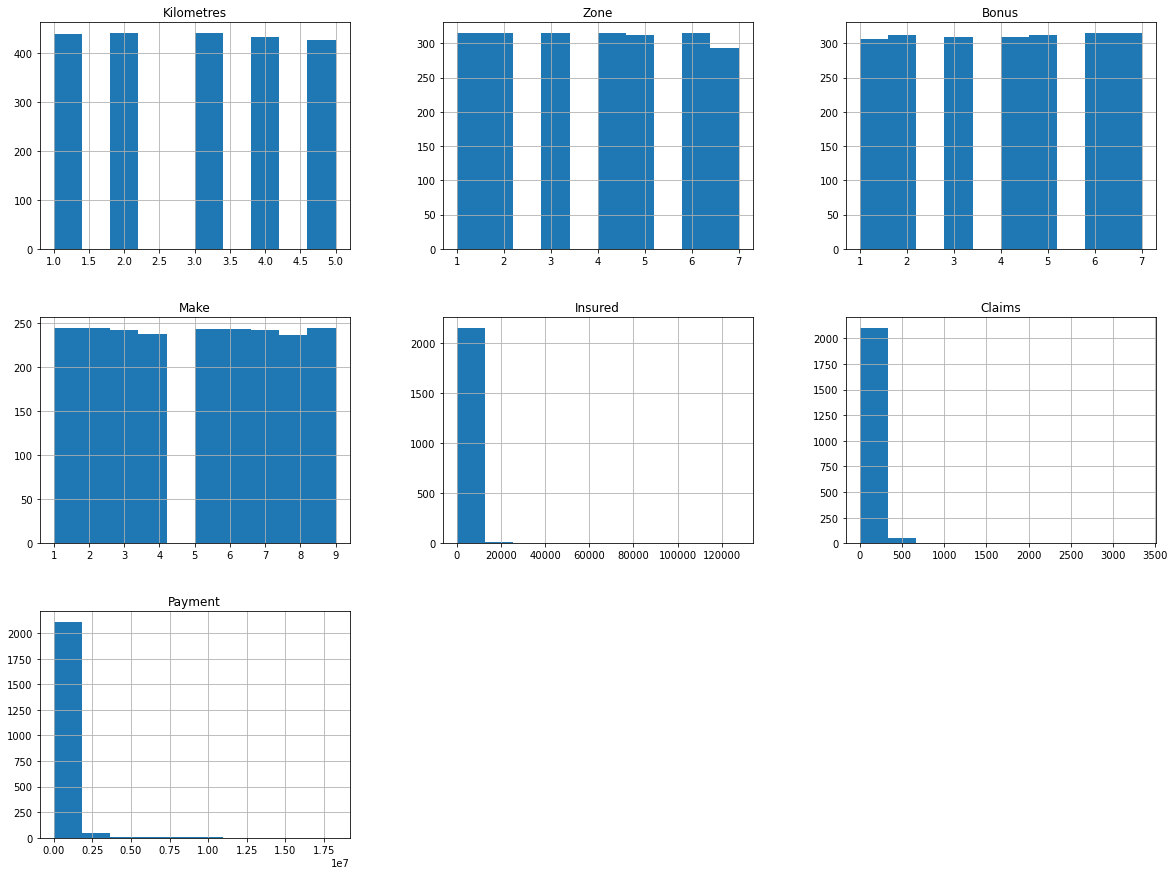

In [3]:
import matplotlib.pyplot as plt
insurance.hist(bins=10, figsize=(20,15))

##### histo graph

### Correlation

In [4]:
corr_matrix = insurance.corr()
corr_matrix["Claims"].sort_values(ascending= False)

Claims        1.000000
Payment       0.995400
Insured       0.910348
Make          0.253212
Bonus         0.105102
Zone         -0.114687
Kilometres   -0.128452
Name: Claims, dtype: float64

##### Here payment, claims and Insured having very strong postive relation.

array([[<AxesSubplot:xlabel='Payment', ylabel='Payment'>,
        <AxesSubplot:xlabel='Claims', ylabel='Payment'>,
        <AxesSubplot:xlabel='Insured', ylabel='Payment'>,
        <AxesSubplot:xlabel='Make', ylabel='Payment'>,
        <AxesSubplot:xlabel='Zone', ylabel='Payment'>,
        <AxesSubplot:xlabel='Kilometres', ylabel='Payment'>],
       [<AxesSubplot:xlabel='Payment', ylabel='Claims'>,
        <AxesSubplot:xlabel='Claims', ylabel='Claims'>,
        <AxesSubplot:xlabel='Insured', ylabel='Claims'>,
        <AxesSubplot:xlabel='Make', ylabel='Claims'>,
        <AxesSubplot:xlabel='Zone', ylabel='Claims'>,
        <AxesSubplot:xlabel='Kilometres', ylabel='Claims'>],
       [<AxesSubplot:xlabel='Payment', ylabel='Insured'>,
        <AxesSubplot:xlabel='Claims', ylabel='Insured'>,
        <AxesSubplot:xlabel='Insured', ylabel='Insured'>,
        <AxesSubplot:xlabel='Make', ylabel='Insured'>,
        <AxesSubplot:xlabel='Zone', ylabel='Insured'>,
        <AxesSubplot:xlabel='Kilo

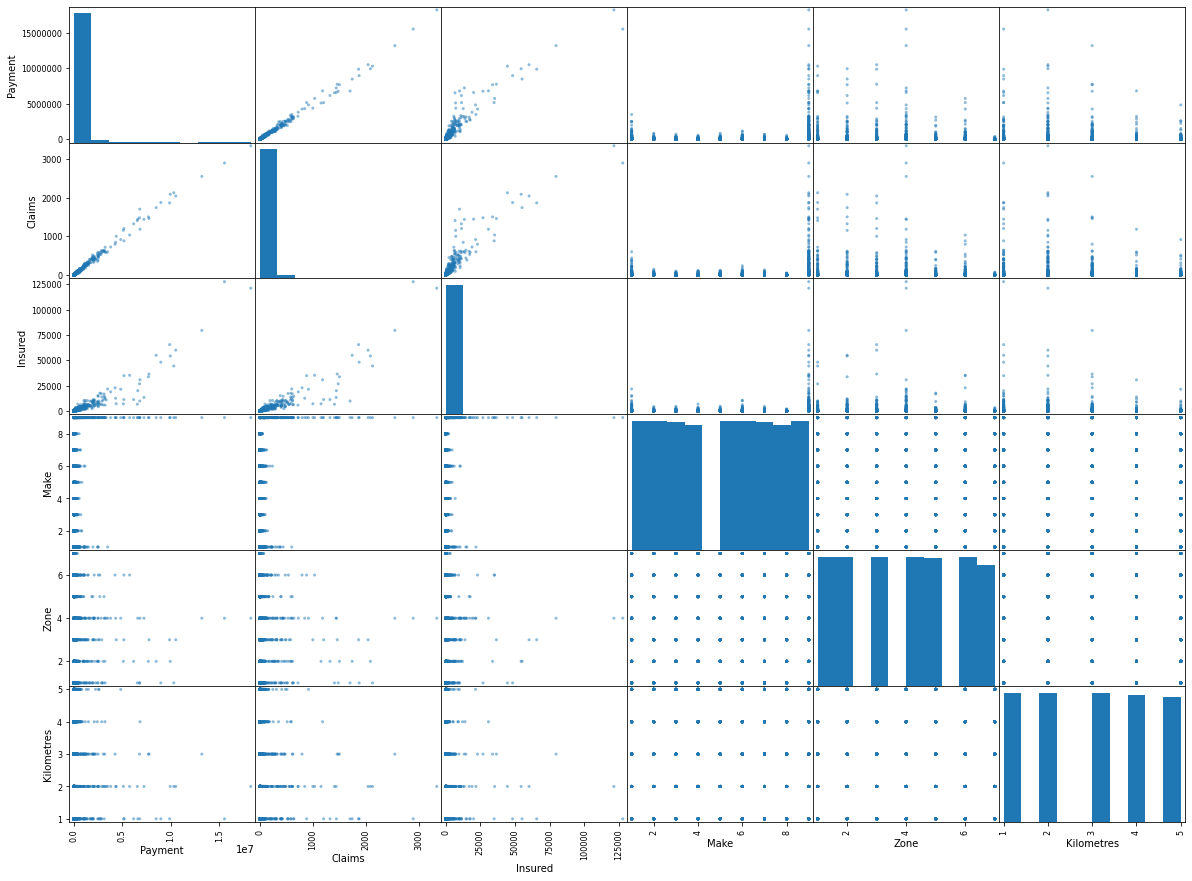

In [5]:
from pandas.plotting import scatter_matrix
attribute =["Payment","Claims","Insured","Make","Zone","Kilometres"]
scatter_matrix(insurance[attribute], figsize=(20,15))

<AxesSubplot:xlabel='Claims', ylabel='Payment'>

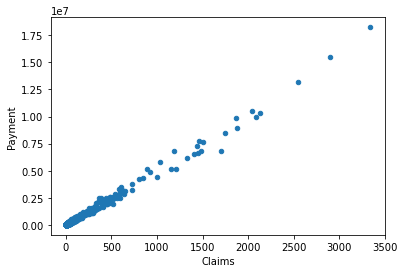

In [6]:
insurance.plot(kind="scatter", x="Claims", y="Payment", alpha= 1)

<AxesSubplot:xlabel='Kilometres', ylabel='Payment'>

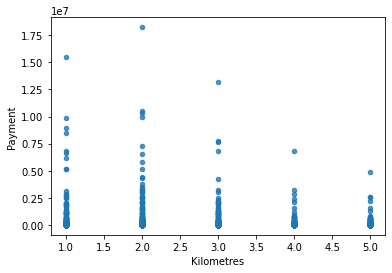

In [7]:
insurance.plot(kind="scatter", x="Kilometres", y="Payment", alpha= 0.8)

<AxesSubplot:xlabel='Bonus', ylabel='Claims'>

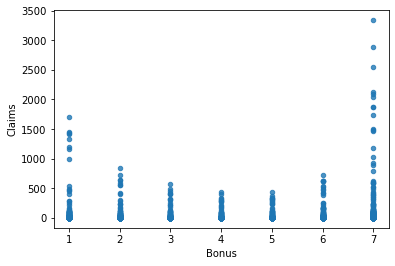

In [8]:
insurance.plot(kind="scatter", x="Bonus", y="Claims", alpha= 0.8)

<AxesSubplot:xlabel='Bonus', ylabel='Payment'>

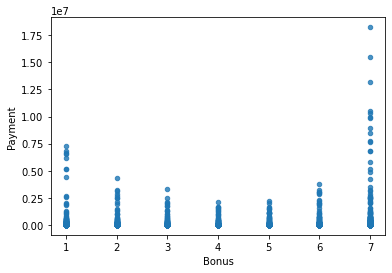

In [9]:
insurance.plot(kind="scatter", x="Bonus", y="Payment", alpha= 0.8)

<AxesSubplot:xlabel='Insured', ylabel='Payment'>

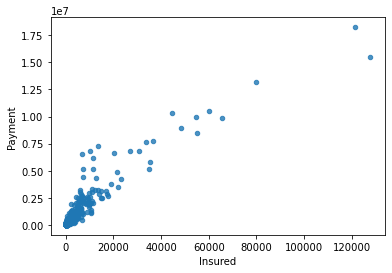

In [10]:
insurance.plot(kind="scatter", x="Insured", y="Payment", alpha= 0.8)

### Train Test Spliting

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance, insurance['Make']):
    strat_train_set= insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]


#### Missing attributes 

In [13]:
insurance =strat_train_set.drop("Claims", axis=1)
insurance_labels = strat_train_set["Claims"].copy()

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(insurance)

SimpleImputer(strategy='median')

In [15]:
imputer.statistics_

array([3.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00, 8.0680e+01,
       2.5061e+04])

#### Creating pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
data_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [17]:
insurance = data_pipeline.fit_transform(insurance)

In [18]:
insurance.shape

(1745, 6)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(insurance, insurance_labels)

LinearRegression()

In [20]:
some_data = insurance[:10]
some_labels= insurance_labels[:10]


In [21]:
prepared_data = data_pipeline.transform(some_data)
model.predict(prepared_data)

array([7.1014497 , 2.57720826, 4.50661786, 5.8264409 , 4.70225703,
       6.09699007, 6.35628629, 5.12166815, 5.38614676, 4.55291057])

In [22]:
from sklearn.metrics import mean_squared_error
insurance_predictions = model.predict(insurance)
lin_mse = mean_squared_error(insurance_labels, insurance_predictions)
lin_rmse = np.sqrt(lin_mse)

In [23]:
lin_rmse

16.388033124241105

#### Using better evalutains technique -cross validation

In [24]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(model, insurance, insurance_labels, scoring='neg_mean_squared_error')
rmse_scores= np.sqrt(-scores)

In [25]:
rmse_scores

array([12.1409388 , 13.57405888, 20.50743636, 19.15289448, 20.76579642])

In [26]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [27]:
print_scores(rmse_scores)

Scores: [12.1409388  13.57405888 20.50743636 19.15289448 20.76579642]
Mean: 17.228224986606314
Standard deviation: 3.63882954178416


#### Saving the model

In [28]:
from joblib import dump,load
dump(model, "Bajaj.joblib")

['Bajaj.joblib']

#### Testing the model on test data set

In [29]:
X_test =strat_test_set.drop("Claims", axis=1)
Y_test = strat_test_set["Claims"].copy()
X_test_prepared = data_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse =np.sqrt(final_mse)

In [30]:
final_rmse

15.29358900269629

In [31]:
prepared_data[0]

array([-3.1163273 , -1.25452697, -1.7463524 , -1.4810861 , -0.20675786,
       -0.25761415])

### Using the model

In [32]:
model = load("Bajaj.joblib")
features = np.array([[-2.62321167, -2.74745584, -2.00777111, -2.53681664, -0.20766901,
       -0.26087213]])
model.predict(features)

array([6.65185787])